In [1]:
from Config import Config, plot_rewards
from Env import env_agent_config, all_seed
from Utils import test, train, to_tensor, plot
from Agent import Agent
import d2l.torch as d2l
import torch

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment BeamRider-v0 is out of date. You should consider upgrading to version `v5` with the environment ID `ALE/BeamRider-v5`.
  logger.warn(
A.L.E: Arcade Learning Environment (version +a7a216c)
[Powered by Stella]
/home/wyq/anaconda3/lib/python3.9/site-packages/gym/utils/seeding.py:138: DeprecationWarning: WARN: Function `hash_seed(seed, max_bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(
/home/wyq/anaconda3/lib/python3.9/site-packages/gym/utils/seeding.py:175: DeprecationWarning: WARN: Function `_bigint_from_bytes(bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(


状态空间维度：210，动作空间维度：9
开始训练！


/home/wyq/anaconda3/lib/python3.9/site-packages/gym/utils/seeding.py:47: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  deprecation(


回合：20/600，奖励：352.00，评估奖励：440.00，最佳评估奖励：440.00，更新模型！1727.9 0.05
回合：40/600，奖励：396.00，评估奖励：396.00，最佳评估奖励：440.00，1684.6 0.05
回合：60/600，奖励：396.00，评估奖励：352.00，最佳评估奖励：440.00，1661.5 0.05
回合：80/600，奖励：220.00，评估奖励：572.00，最佳评估奖励：572.00，更新模型！1695.05 0.05
回合：100/600，奖励：352.00，评估奖励：352.00，最佳评估奖励：572.00，1618.2 0.05
回合：120/600，奖励：484.00，评估奖励：440.00，最佳评估奖励：572.00，1671.4 0.05
回合：140/600，奖励：396.00，评估奖励：264.00，最佳评估奖励：572.00，1697.55 0.05
回合：160/600，奖励：352.00，评估奖励：616.00，最佳评估奖励：616.00，更新模型！1670.4 0.05
回合：180/600，奖励：308.00，评估奖励：528.00，最佳评估奖励：616.00，1753.8 0.05
回合：200/600，奖励：572.00，评估奖励：396.00，最佳评估奖励：616.00，1767.4 0.05
回合：220/600，奖励：440.00，评估奖励：616.00，最佳评估奖励：616.00，更新模型！1846.3 0.05
回合：240/600，奖励：572.00，评估奖励：176.00，最佳评估奖励：616.00，1856.75 0.05
回合：260/600，奖励：396.00，评估奖励：264.00，最佳评估奖励：616.00，1848.1 0.05
回合：280/600，奖励：572.00，评估奖励：0.00，最佳评估奖励：616.00，1830.9 0.05
回合：300/600，奖励：484.00，评估奖励：0.00，最佳评估奖励：616.00，1774.5 0.05
回合：320/600，奖励：572.00，评估奖励：0.00，最佳评估奖励：616.00，1825.15 0.05
回合：340/600，奖励：572.00，评估奖励：0.00，最佳评估奖励：616.

/home/wyq/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/wyq/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


回合：1/10，奖励：528.00
回合：2/10，奖励：528.00
回合：3/10，奖励：440.00
回合：4/10，奖励：308.00
回合：5/10，奖励：352.00
回合：6/10，奖励：220.00
回合：7/10，奖励：484.00
回合：8/10，奖励：396.00
回合：9/10，奖励：264.00
回合：10/10，奖励：572.00
完成测试


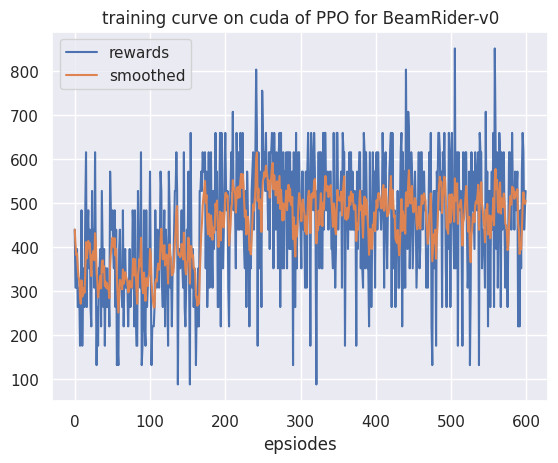

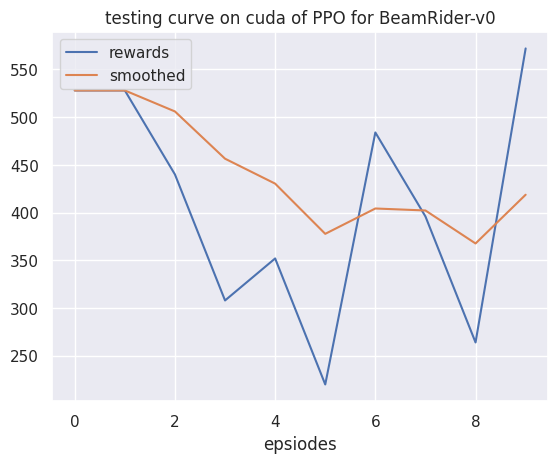

In [2]:
cfg = Config()
# 训练
env, agent = env_agent_config(cfg)
best_agent,res_dic = train(cfg, env, agent)
 
plot_rewards(res_dic['rewards'], cfg, tag="train")  
# 测试
res_dic = test(cfg, env, best_agent)
plot_rewards(res_dic['rewards'], cfg, tag="test")  # 画出结果

In [8]:
best_agent,res_dic = train(cfg, env, agent)

开始训练！
回合：20/600，奖励：440.00，评估奖励：0.00，最佳评估奖励：0.00，更新模型！1768.15 0.05
回合：40/600，奖励：528.00，评估奖励：0.00，最佳评估奖励：0.00，更新模型！1770.75 0.05
回合：60/600，奖励：660.00，评估奖励：0.00，最佳评估奖励：0.00，更新模型！1803.25 0.05
回合：80/600，奖励：220.00，评估奖励：352.00，最佳评估奖励：352.00，更新模型！1784.9 0.05
回合：100/600，奖励：484.00，评估奖励：0.00，最佳评估奖励：352.00，1829.8 0.05
回合：120/600，奖励：352.00，评估奖励：88.00，最佳评估奖励：352.00，1664.95 0.05
回合：140/600，奖励：528.00，评估奖励：352.00，最佳评估奖励：352.00，更新模型！1760.05 0.05
回合：160/600，奖励：572.00，评估奖励：0.00，最佳评估奖励：352.00，1784.75 0.05
回合：180/600，奖励：616.00，评估奖励：0.00，最佳评估奖励：352.00，1851.1 0.05
回合：200/600，奖励：352.00，评估奖励：0.00，最佳评估奖励：352.00，1822.35 0.05
回合：220/600，奖励：352.00，评估奖励：0.00，最佳评估奖励：352.00，1732.8 0.05
回合：240/600，奖励：572.00，评估奖励：0.00，最佳评估奖励：352.00，1724.45 0.05
回合：260/600，奖励：396.00，评估奖励：132.00，最佳评估奖励：352.00，1945.25 0.05
回合：280/600，奖励：352.00，评估奖励：0.00，最佳评估奖励：352.00，1797.4 0.05
回合：300/600，奖励：660.00，评估奖励：0.00，最佳评估奖励：352.00，1852.55 0.05
回合：320/600，奖励：616.00，评估奖励：0.00，最佳评估奖励：352.00，1703.65 0.05
回合：340/600，奖励：572.00，评估奖励：0.00，最佳评估奖励：352.00，1851

1 tensor(1.4194) tensor([8.7919e-08, 1.0000e+00, 3.1388e-08, 6.7365e-08, 5.1366e-08, 6.3047e-08,
        5.1606e-08, 4.6860e-08, 9.6789e-08]) 0.0
1 tensor(1.9592) tensor([1.5935e-11, 1.0000e+00, 3.3975e-12, 1.0912e-11, 7.1616e-12, 9.9327e-12,
        7.1186e-12, 6.2363e-12, 1.8682e-11]) 0.0
1 tensor(1.9577) tensor([1.6684e-11, 1.0000e+00, 3.5669e-12, 1.1431e-11, 7.5081e-12, 1.0406e-11,
        7.4637e-12, 6.5397e-12, 1.9551e-11]) 0.0
1 tensor(1.9952) tensor([1.4502e-11, 1.0000e+00, 3.0744e-12, 9.9192e-12, 6.4990e-12, 9.0261e-12,
        6.4591e-12, 5.6565e-12, 1.7014e-11]) 0.0
1 tensor(2.0735) tensor([5.5198e-15, 1.0000e+00, 7.2979e-16, 3.4113e-15, 1.9479e-15, 3.0258e-15,
        1.9170e-15, 1.6237e-15, 6.8656e-15]) 0.0
1 tensor(2.0142) tensor([4.6459e-15, 1.0000e+00, 6.0796e-16, 2.8651e-15, 1.6311e-15, 2.5396e-15,
        1.6045e-15, 1.3582e-15, 5.7863e-15]) 0.0
1 tensor(2.0206) tensor([3.1273e-15, 1.0000e+00, 3.9980e-16, 1.9185e-15, 1.0843e-15, 1.6986e-15,
        1.0670e-15, 9.0133e

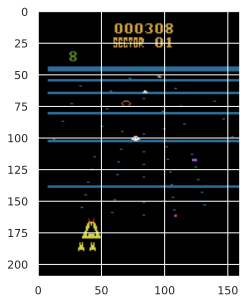

In [12]:
from IPython import display
import matplotlib.pyplot as plt
# cfg = Config() 
# env, agent = env_agent_config(cfg)
draw_agent = best_agent
# draw_agent = best_agent
show_image = True
draw_agent.actor.eval()
NUM_OF_TEST = 1
test_total_reward = []
action_list = []
actor_out = []
actions = []
critic_list = []
reward_list = []
count = 0
for i in range(NUM_OF_TEST):
    state = env.reset()
    unwrapped_env = env.unwrapped
    state = unwrapped_env.ale.getRAM()
    total_reward = 0
    done = False
    if show_image:
        img = plt.imshow(env.render(mode='rgb_array'))
    while not done:
        action = draw_agent.predict_action(state)
        if count == 50:
            action = 2
        actor_out.append(draw_agent.actor(to_tensor(state, cfg)))
        actions.append(action)
        critic_list.append(draw_agent.critic(to_tensor(state, cfg)))
        state, reward, done, _ = env.step(action)
        state = unwrapped_env.ale.getRAM()
        total_reward += reward
        reward_list.append(reward)

        if show_image:
            img.set_data(env.render(mode='rgb_array'))
            display.display(plt.gcf())
            display.clear_output(wait=True)
        count += 1
        if count == 600:
            break

for i in range(len(actor_out)):
    print(actions[i],critic_list[i].detach().cpu()[0],actor_out[i].detach().cpu()[0], reward_list[i])
draw_agent.actor.train()
print("length of actions is ", len(actions))


tensor([[[[0.0000, 0.0000, 0.0000, 0.0884, 0.0000, 0.0000, 0.0000, 0.0000]]]],
       grad_fn=<ToCopyBackward0>)

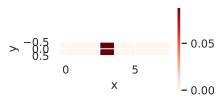

In [10]:
d2l.show_heatmaps(draw_agent.actor.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
draw_agent.actor.atten.view(1, 1, 1, 8).cpu()

In [13]:
torch.save(best_agent, './Data/BeamRider-v0-RAM-None/Ex1_Best.pt')